# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# Loading dataset

In [2]:
data=pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Preparing data for training

In [3]:
X=data.iloc[:,1:5]
y=data.iloc[:,5]

In [4]:
#Splitting data into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [5]:
#Feature Scaling as this model involves calculation of distances between two points and hence it is better to feature scale
#data before fitting to our model.
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Creating model using KNN

In [6]:
classifier=KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

# Predicting values for our test set

In [7]:
y_pred=classifier.predict(X_test)

# Evaluating model prediction

In [8]:
print("Accuracy for test set is:",accuracy_score(y_test,y_pred)*100,"%")

Accuracy for test set is: 100.0 %


Text(0.5, 1, 'Confusion Matrix for KNN')

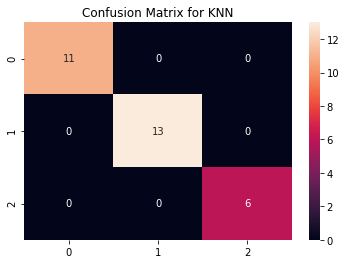

In [9]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix for KNN")

In [10]:
print("Accuracy for training set:",accuracy_score(y_train,classifier.predict(X_train))*100,"%")

Accuracy for training set: 96.66666666666667 %


>KNN gives us 100% accuracy for test set and 96.67% accuracy for training set.